In [27]:
#regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [28]:
df=pd.read_csv('IRIS.csv')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [30]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [31]:
y=df['species']
X=df.drop('species',axis=1)



In [49]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.75,random_state=42)


model=KNeighborsClassifier(n_neighbors=3) 
model.fit(X_train,y_train)

accuracy=model.score(X_test,y_test)*100
print(accuracy)


97.34513274336283


In [33]:
model.predict([[5,3,5,2]])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

In [35]:
#naives bayes
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,y_train)
accuracy2=model2.score(X_test,y_test)*100
print(accuracy2)

95.57522123893806


In [36]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
accuracy3=model3.score(X_test,y_test)*100
print(accuracy3)

92.92035398230088


In [37]:
#svm
from sklearn.svm import SVC
model4=SVC()
model4.fit(X_train,y_train)
accuracy4=model4.score(X_test,y_test)*100
print(accuracy4)

96.46017699115043


In [38]:
#logistics 
from sklearn.linear_model import LogisticRegression
model5=LogisticRegression()
model5.fit(X_train,y_train)
accuracy5=model5.score(X_test,y_test)*100
print(accuracy5)


96.46017699115043


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_scorer.p

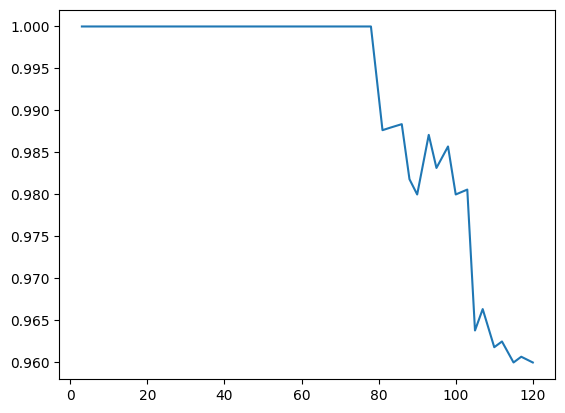

In [40]:
#plot learning curve
from sklearn.model_selection import learning_curve
train_sizes,train_scores,validation_scores=learning_curve(estimator=model,X=X,y=y,train_sizes=np.linspace(0.01,1,50),cv=5,scoring='accuracy')
train_scores_mean=train_scores.mean(axis=1)
validation_scores_mean=validation_scores.mean(axis=1)
plt.plot(train_sizes,train_scores_mean,label='train')
plt.show()

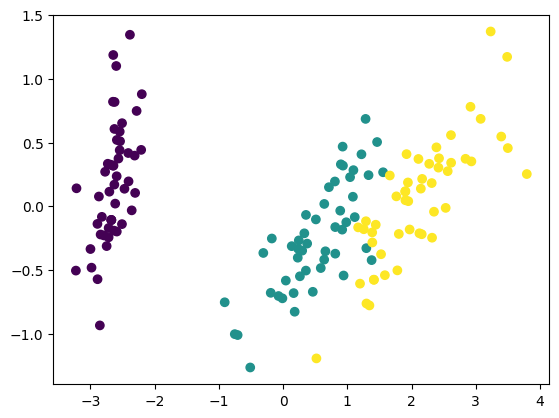

In [48]:
#plot scatter with colros for eahc category
#apply pca
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
c=y.map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
plt.scatter(X_pca[:,0],X_pca[:,1],c=c)
